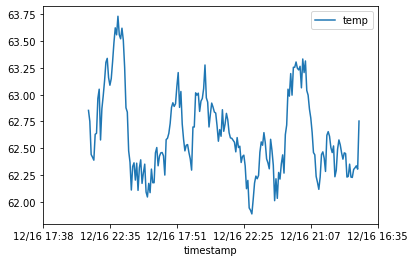

In [113]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone

dynamodb = boto3.resource('dynamodb')
table = dynamodb.Table('iot-temp')

def compress_ticks(axis):
    ticks = ax.get_xticks()
    ax.set_xticks(ticks[::2])

    ticklabels = [datetime.fromtimestamp(int(l.get_text())/1000, timezone('US/Pacific')).strftime('%m/%d %H:%M')if l.get_text() != '' else '' for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticklabels(ticklabels)


response = table.scan()
data = response.get('Items', [])
temps = [item['payload'] for item in data]
df = pd.DataFrame(temps)
df['temp'] = df['temp'].apply(lambda x: float(x))
df.set_index('timestamp', inplace = True)

avg = df.rolling(10).mean()
ax = avg.plot()
compress_ticks(ax)

plt.show()